# Christmas lights & tourism in Vigo

## Overnight stays in december (2010-2020).

Data from INE. Statistics for Vigo compared to the closest cities in Spain with similar population (250K to 300K inhabitants): A Coruña, Gijón, Valladolid.

Source: https://www.ine.es/jaxiT3/files/t/en/csv_bd/2078.csv


### Load and Transform Data

In [13]:
import pandas as pd
df = pd.read_csv('2078.csv', sep='\t')
df=df.dropna()
df['Total'] = df['Total'].apply(lambda x:str(x).replace(',','').replace('.','0')).astype(int)

In [14]:
# Filters
maskarea = df['Tourist areas'].isin(['36057 Vigo','15030 Coruña, A','33024 Gijón','47186 Valladolid'])
maskmetric = (df['Guests and overnight stays']=='Overnight stays')
maskperiod = df['Period'].isin(['2010M12','2011M12','2012M12','2013M12','2014M12','2015M12','2016M12', '2017M12','2018M12','2019M12','2020M12'])
mask = maskarea & maskmetric & maskperiod

In [16]:
df2 = df[mask].sort_values('Period')
df2['Period']=df2['Period'].apply(lambda x: x.replace('M12',''))
df2.set_index('Period', inplace=True)

### Plot charts

#### Residents in Spain

Text(0.5, 1.0, 'Fuente: INE (https://www.ine.es/jaxiT3/dlgExport.htm?t=2078)')

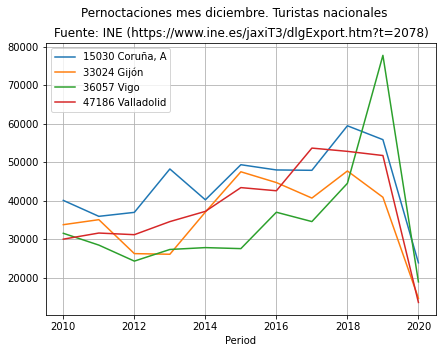

In [17]:
SOURCE_LABEL='Fuente: INE (https://www.ine.es/jaxiT3/dlgExport.htm?t=2078)'
import matplotlib.pyplot as plt
df2[df2['Residence']=='Residents in Spain'].groupby('Tourist areas')['Total'].plot(legend=True,figsize=(7,5))
plt.grid()
plt.suptitle('Pernoctaciones mes diciembre. Turistas nacionales')
plt.title(SOURCE_LABEL)

#### Residents abroad

Text(0.5, 1.0, 'Fuente: INE (https://www.ine.es/jaxiT3/dlgExport.htm?t=2078)')

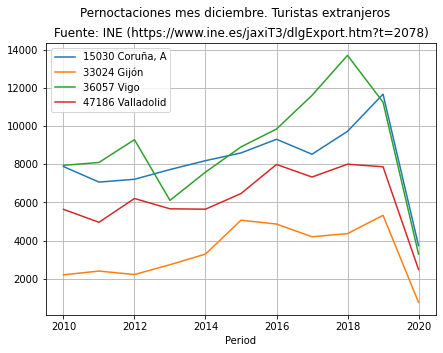

In [18]:
df2[df2['Residence']=='Residents abroad'].groupby('Tourist areas')['Total'].plot(legend=True,figsize=(7,5))
plt.grid()
plt.suptitle('Pernoctaciones mes diciembre. Turistas extranjeros')
plt.title(SOURCE_LABEL)

#### Overall: Residents in Spain + Residents abroad

In [19]:
df2['Overall']= df2.groupby(['Tourist areas','Period']).transform(sum)['Total']

Text(0.5, 1.0, 'Fuente: INE (https://www.ine.es/jaxiT3/dlgExport.htm?t=2078)')

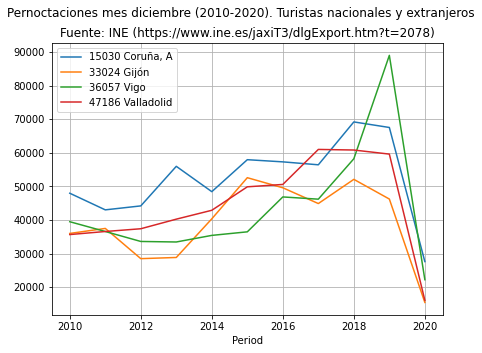

In [20]:
df2[df2['Residence']=='Residents in Spain'].groupby('Tourist areas')['Overall'].plot.line(legend=True,figsize=(7,5))
plt.grid()
plt.suptitle('Pernoctaciones mes diciembre (2010-2020). Turistas nacionales y extranjeros')
plt.title('Fuente: INE (https://www.ine.es/jaxiT3/dlgExport.htm?t=2078)')